# Demo

## Imports

In [1]:
import pandas as pd
import numpy as np

import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

In [2]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Activation
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
TF_ENABLE_ONEDNN_OPTS=0

2022-10-20 12:21:58.399072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-20 12:21:58.529797: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
from helpers.training_helpers import *
from helpers.preprocessing_helpers import *
from helpers.exploration_helpers import *


In [6]:
Ravdess = "data/raw/RAVDESS/audio_speech_actors_01-24/"
Crema = "data/raw/CREMA_D/AudioWAV/"

## Data import

In [7]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        try:
            file_emotion.append(int(part[2]))
            file_path.append(Ravdess + dir + '/' + file)
        except:
            pass
            #print(part) # Folders themself
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  data/raw/RAVDESS/audio_speech_actors_01-24/Act...
1  neutral  data/raw/RAVDESS/audio_speech_actors_01-24/Act...
2  neutral  data/raw/RAVDESS/audio_speech_actors_01-24/Act...
3  neutral  data/raw/RAVDESS/audio_speech_actors_01-24/Act...
4     calm  data/raw/RAVDESS/audio_speech_actors_01-24/Act...

In [8]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append(Crema + file)
    
    part=file.split('_')
    if part[0] == "AudioWAV":
        pass #print(part) #folder
    elif part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                           Path
0    angry  data/raw/CREMA_D/AudioWAV/1001_DFA_ANG_XX.wav
1  disgust  data/raw/CREMA_D/AudioWAV/1001_DFA_DIS_XX.wav
2     fear  data/raw/CREMA_D/AudioWAV/1001_DFA_FEA_XX.wav
3    happy  data/raw/CREMA_D/AudioWAV/1001_DFA_HAP_XX.wav
4  neutral  data/raw/CREMA_D/AudioWAV/1001_DFA_NEU_XX.wav

In [9]:
# creating Dataframe using all the 4 dataframes we created so far.

#data_path = pd.concat([Ravdess_df, Crema_df], axis = 0)
data_path = pd.concat([Ravdess_df], axis = 0)
#data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  data/raw/RAVDESS/audio_speech_actors_01-24/Act...
1  neutral  data/raw/RAVDESS/audio_speech_actors_01-24/Act...
2  neutral  data/raw/RAVDESS/audio_speech_actors_01-24/Act...
3  neutral  data/raw/RAVDESS/audio_speech_actors_01-24/Act...
4     calm  data/raw/RAVDESS/audio_speech_actors_01-24/Act...

## Plot data

### Part 1

### Waveforms

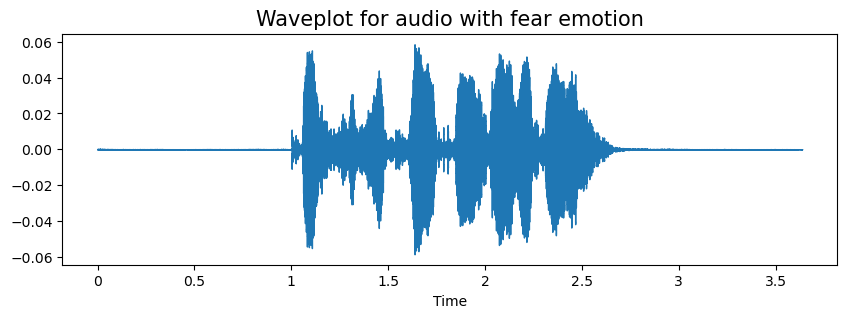

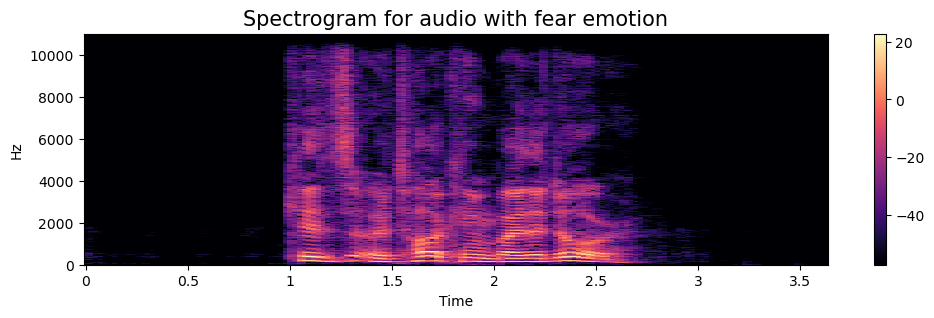

In [10]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

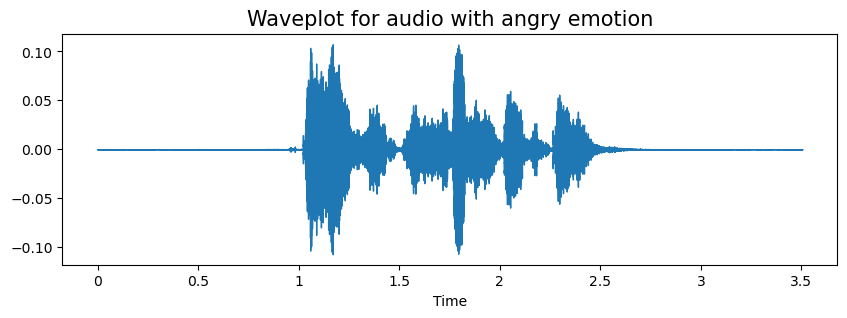

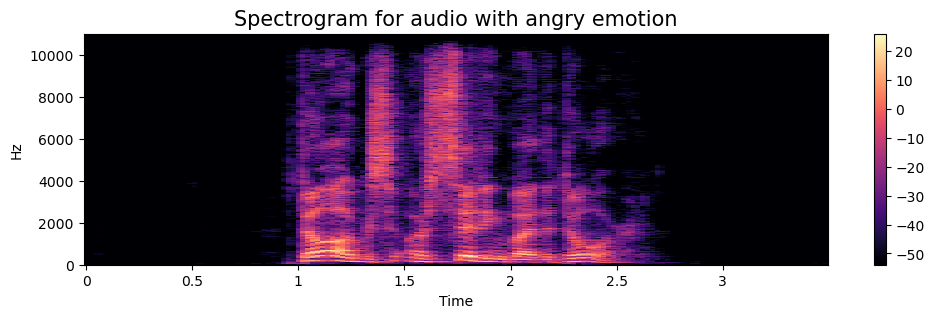

In [11]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

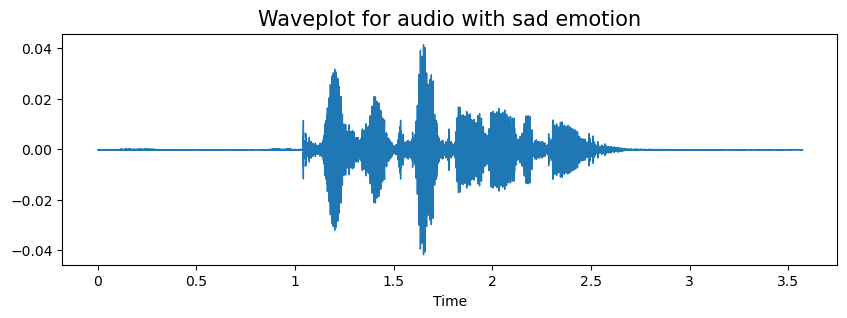

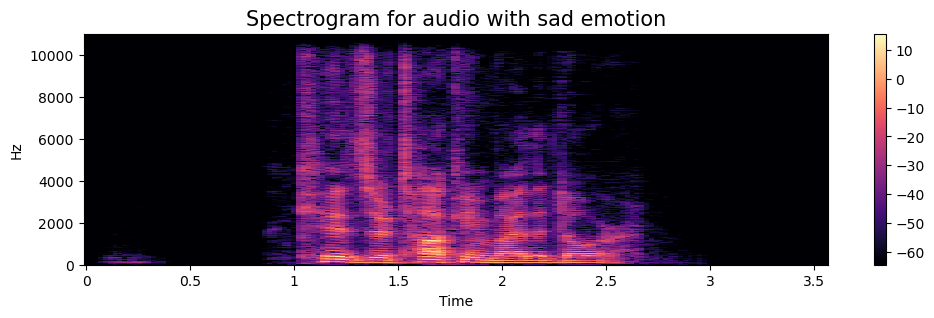

In [12]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

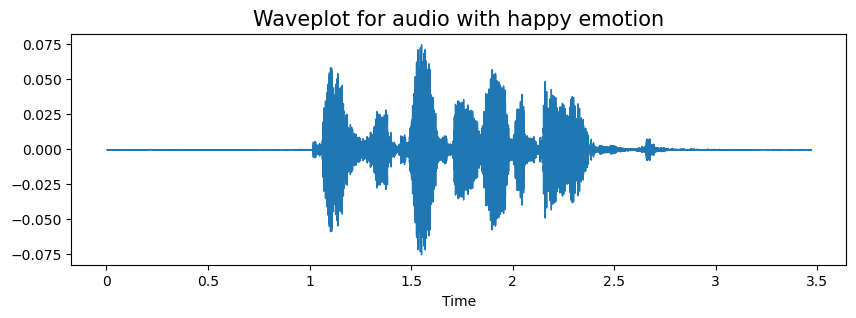

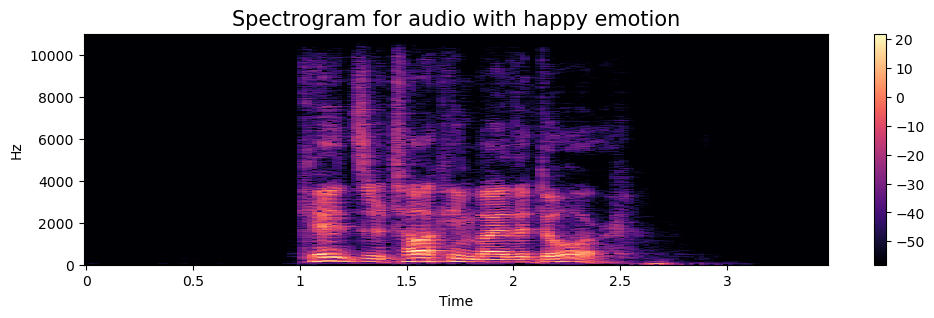

In [13]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

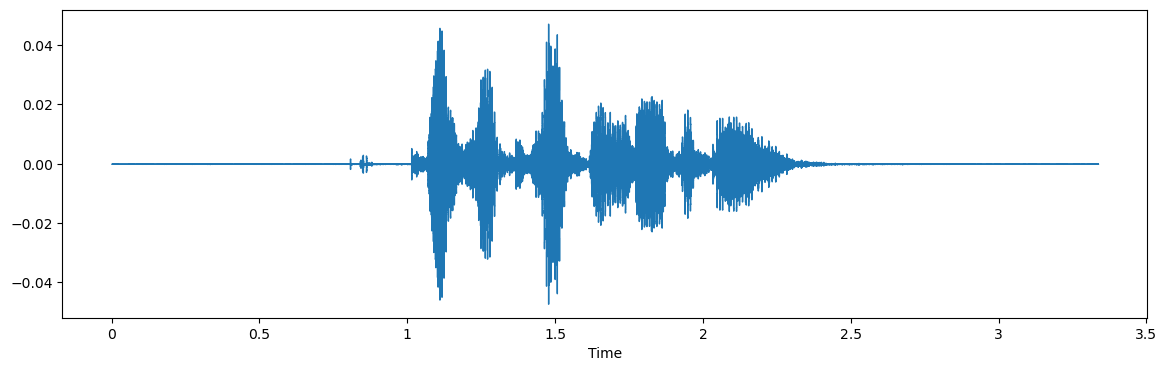

In [15]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

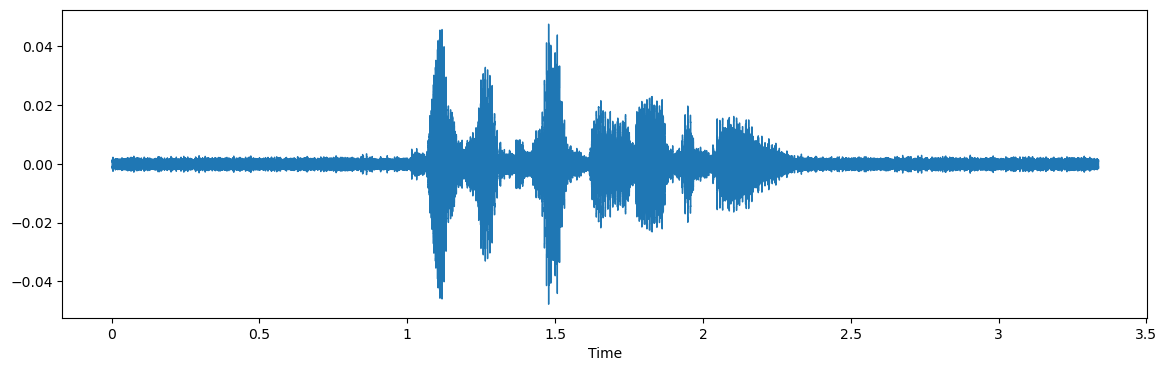

In [16]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

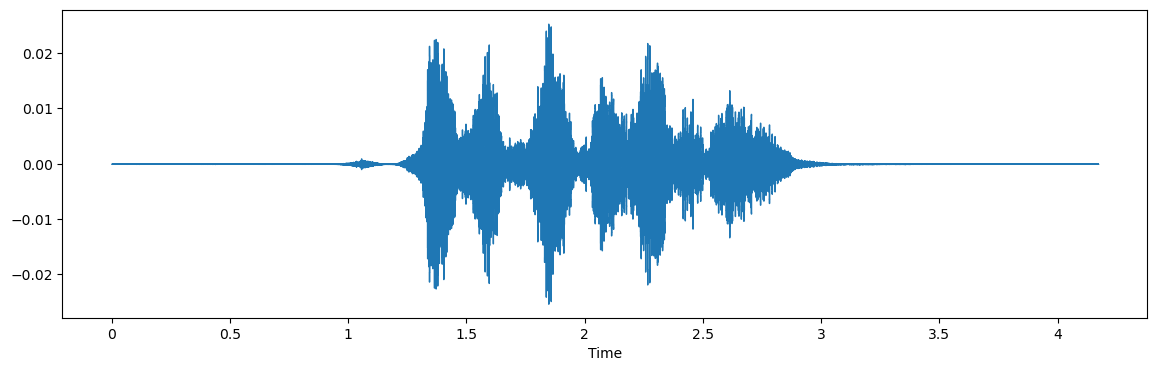

In [17]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

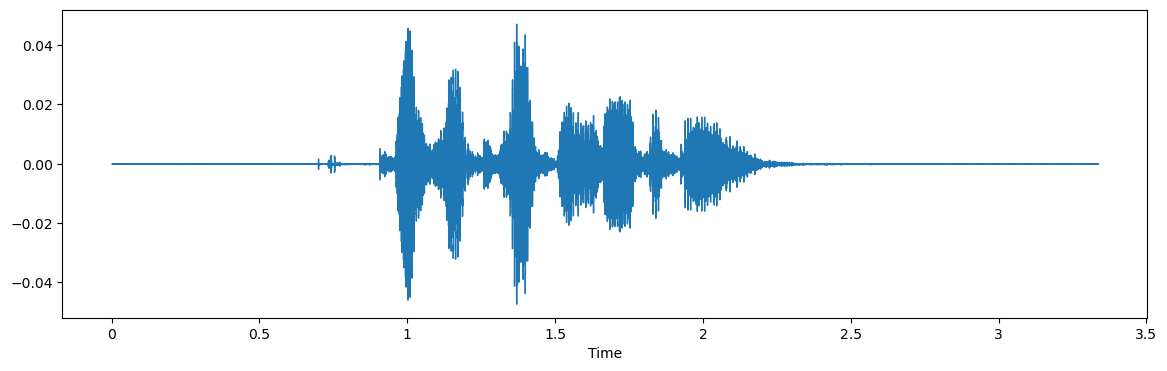

In [18]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

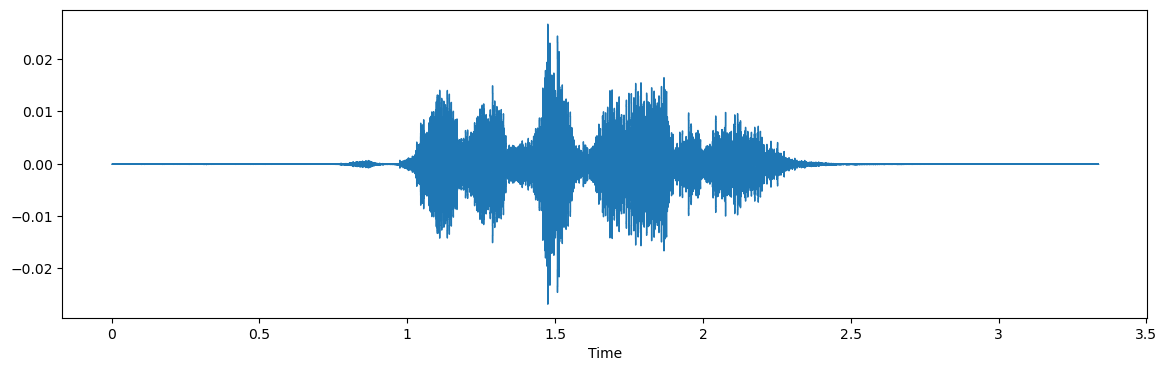

In [19]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Extract Data

In [20]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    #print(path)
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

OSError: [Errno 40] Too many levels of symbolic links: 'data/raw/CREMA_D/AudioWAV/AudioWAV'

In [ ]:

label_names = np.unique(np.array(data_path.Emotions.values))
len(X), len(Y), data_path.Path.shape

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
#Features.to_csv('features.csv', index=False)
Features.head()

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same', input_shape=(x_train.shape[1],1))) 
model.add(Activation('relu'))

model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1])) # Target class number
model.add(Activation('softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy', "mse", "mae"])
#model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy')

model.summary()

In [ ]:
# compile_kwargs = {
#   "optimizer": 'adam', 
#   "loss": 'categorical_crossentropy',
#   "metrics": ["accuracy", "mse", "mae"],
# }
 
# fit_kwargs = {
#   "x": x_train_scale, 
#   "y": y_train,
#   "epochs": 10,
#   "verbose": 2
# }

# run_name = 'SGD'
# run = train_with_mlflow(run_name, model, compile_kwargs, fit_kwargs)

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

In [ ]:
label_names_tensor = tf.convert_to_tensor(label_names)

inputs={'image': model.input},
outputs={'label' : label_names_tensor,'prediction': model.output[0]}

label_names

In [ ]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

## Testing

In [ ]:
import pickle
type(encoder)

In [ ]:
model.summary()
#todo model.summary to MLflow

In [ ]:
#save_model(model, "test_example", "003")

In [ ]:
y_pred = encoder.inverse_transform(model.predict(x_test))



In [ ]:
type(Ravdess_df)

In [ ]:
print(classification_report(y_test, y_pred))
report, a = classification_report_to_dataframe(classification_report(y_test, y_pred))
print(report)

In [ ]:
report

In [ ]:
report[report["class"] == "angry"]
columns = report.columns
columns

In [ ]:
report.iloc[0,1]
for i in range(len(columns)):
    print(columns[i],report.iloc[0,i])
    

In [ ]:

df = model_summary_to_MLFlow(model, "model_name", "", "")
df

In [ ]:
df.shape


In [ ]:
columns = df.columns
for r in range(df.shape[0]):
    f = df.iloc[r,0]
    output_shape = df.iloc[r,1]
    params = df.iloc[r,2]
    print(f, output_shape, params)
        

In [ ]:
save_encoder(encoder)